In [ ]:
!pip install geopandas

In [ ]:
%matplotlib inline

import pandas as pd
import geopandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
parchi = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Parchi_regionali_e_nazionali_polygon.zip")
parchi

In [ ]:
comu = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/Com01012021_g")
comu

In [ ]:
prov = geopandas.read_file("/content/drive/MyDrive/Limiti01012021_g/ProvCM01012021_g")
prov

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,Shape_Leng,Shape_Area,geometry
0,1,1,1,201,201,-,Torino,Torino,TO,Citta metropolitana,539249.811270,6.828137e+09,"POLYGON ((411015.006 5049970.983, 411266.039 5..."
1,1,1,2,0,2,Vercelli,-,Vercelli,VC,Provincia,418078.067821,2.082097e+09,"POLYGON ((438328.612 5087208.215, 439028.888 5..."
2,1,1,3,0,3,Novara,-,Novara,NO,Provincia,250242.112077,1.341318e+09,"POLYGON ((460929.542 5076320.298, 461165.259 5..."
3,1,1,4,0,4,Cuneo,-,Cuneo,CN,Provincia,490111.881318,6.898443e+09,"MULTIPOLYGON (((378673.492 4958865.159, 378928..."
4,1,1,5,0,5,Asti,-,Asti,AT,Provincia,315563.261771,1.508947e+09,"POLYGON ((425041.329 4997628.309, 424948.989 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,1,1,103,0,103,Verbano-Cusio-Ossola,-,Verbano-Cusio-Ossola,VB,Provincia,299029.117691,2.262164e+09,"POLYGON ((457749.464 5145501.795, 458662.395 5..."
103,1,3,108,0,108,Monza e della Brianza,-,Monza e della Brianza,MB,Provincia,126272.490811,4.055793e+08,"POLYGON ((519754.706 5065242.380, 520199.702 5..."
104,3,11,109,0,109,Fermo,-,Fermo,FM,Provincia,198635.321418,8.619365e+08,"POLYGON ((884760.019 4804406.440, 885511.011 4..."
105,4,16,110,0,110,Barletta-Andria-Trani,-,Barletta-Andria-Trani,BT,Provincia,237762.889058,1.542032e+09,"POLYGON ((1081237.144 4611047.023, 1081399.393..."


In [ ]:
!pip install contextily

In [ ]:
import contextily

1. visualizzi i parchi di Milano e i comuni che vi fanno parte (vedi immagine allegata)

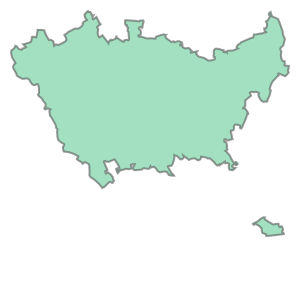

In [ ]:
milano = prov[prov['SIGLA'] == 'MI'].geometry.squeeze()
milano

In [ ]:
comMil = comu[comu.within(milano)]
comMil

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry
1811,1,3,15,215,215,15002,015002,Abbiategrasso,None,0,43048.321516,4.777153e+07,"POLYGON ((493446.898 5029705.643, 493602.897 5..."
1812,1,3,15,215,215,15005,015005,Albairate,None,0,18919.829233,1.567417e+07,"POLYGON ((495595.883 5032525.624, 495661.881 5..."
1813,1,3,15,215,215,15007,015007,Arconate,None,0,14414.349393,8.611972e+06,"POLYGON ((488023.938 5045041.530, 488050.939 5..."
1814,1,3,15,215,215,15009,015009,Arese,None,0,14252.406342,6.317493e+06,"POLYGON ((506416.116 5045124.529, 506782.458 5..."
1815,1,3,15,215,215,15010,015010,Arluno,None,0,18646.960825,1.278364e+07,"POLYGON ((496562.280 5041533.478, 496401.277 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,1,3,15,215,215,15247,015247,Zibido San Giacomo,None,0,29317.414806,2.443786e+07,"POLYGON ((506102.367 5028375.154, 506991.706 5..."
1940,1,3,15,215,215,15248,015248,Villa Cortese,None,0,8393.080188,3.499843e+06,"POLYGON ((490864.917 5047319.512, 491416.914 5..."
1941,1,3,15,215,215,15249,015249,Vanzaghello,None,0,13065.614920,5.624381e+06,"POLYGON ((484327.133 5049844.538, 484144.917 5..."
1942,1,3,15,215,215,15250,015250,Baranzate,None,0,6567.963947,2.944838e+06,"POLYGON ((509363.172 5042554.492, 509538.293 5..."


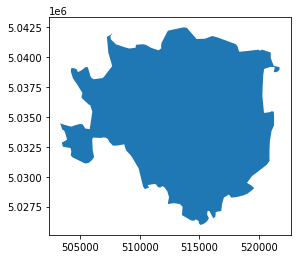

In [ ]:
MI = comu[comu["COMUNE"] == "Milano"]
MI.plot()

In [ ]:
parchiMil = parchi[parchi.intersects(MI.geometry.squeeze())]
parchiMil

,FID,NOME,COD_AREA,CLASSIF,DCLASSIF,TIPO,DTIPO,TIPO_AREA,DTIPO_AREA,COD_NOME,geometry
20,21,Parco Nord Milano,22,5,Parco di cintura metropolitana,2,Parco Regionale,1,Area Regionale,22:Parco Nord Milano,"POLYGON ((516502.662 5041742.040, 516403.321 5..."
21,22,Parco Sud Milano,23,15,Parco agricolo e di cintura metropolitana,2,Parco Regionale,1,Area Regionale,23:Parco Sud Milano,"POLYGON ((533691.079 5042919.602, 533758.703 5..."


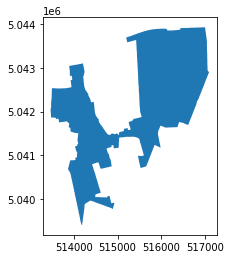

In [ ]:
parcoNord = parchiMil[parchiMil.NOME == 	"Parco Nord Milano"]
parcoNord.plot()

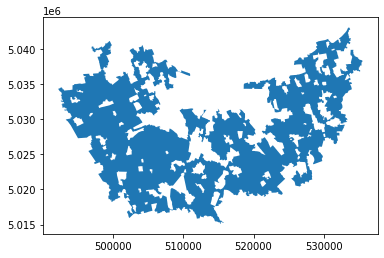

In [ ]:
parcoSud = parchiMil[parchiMil.NOME == "Parco Sud Milano"]
parcoSud.plot()

In [ ]:
parchiProv = comu[comu.intersects(parcoNord) | comu.intersects(parcoSud)]
parchiProv 

/usr/local/lib/python3.7/dist-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
/usr/local/lib/python3.7/dist-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,PRO_COM,PRO_COM_T,COMUNE,COMUNE_A,CC_UTS,Shape_Leng,Shape_Area,geometry


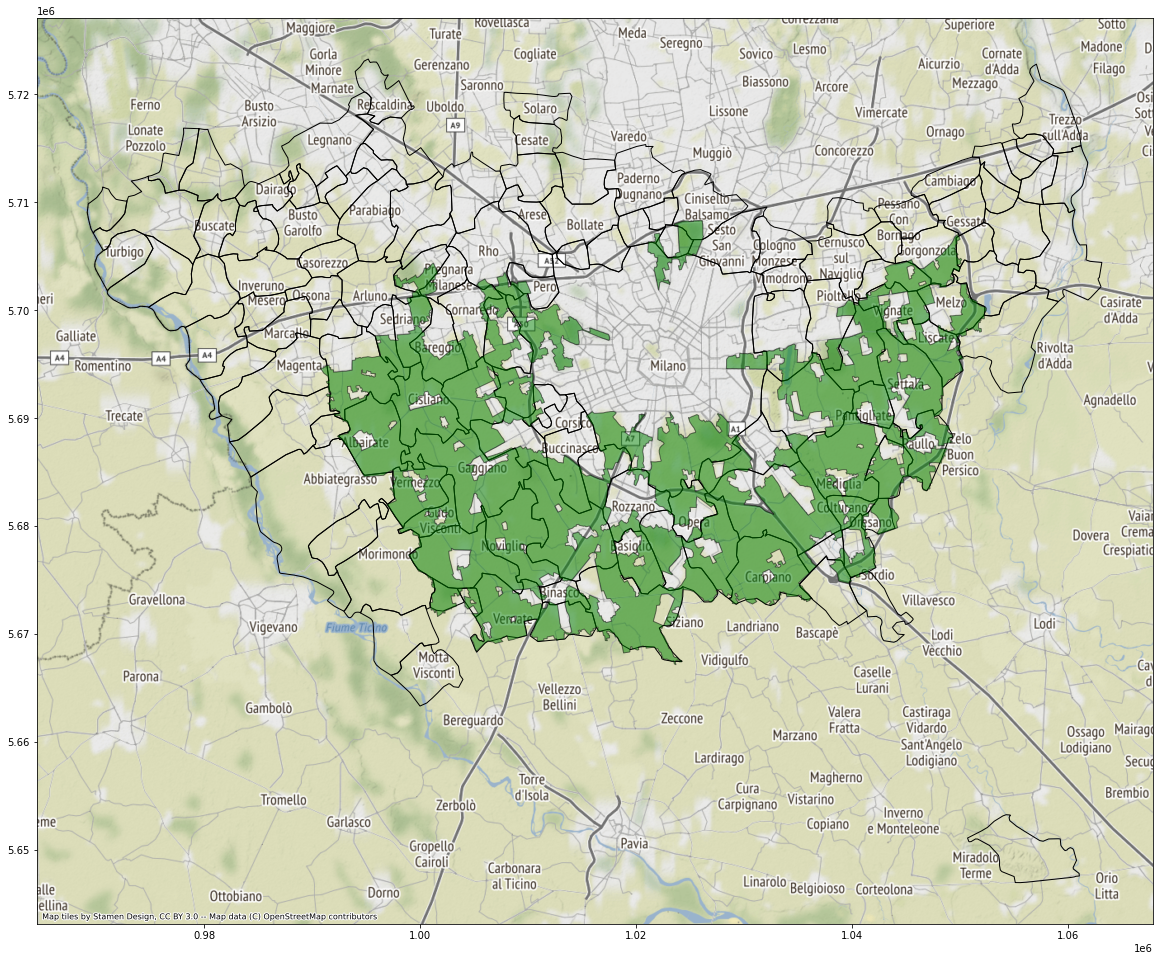

In [ ]:
ax = comMil.to_crs(epsg=3857).plot(figsize =(20,20), facecolor="none", edgecolor = "k")
parchiMil.to_crs(epsg=3857).plot(ax=ax, figsize =(20,20), facecolor="green", edgecolor = "k", alpha = 0.5)
contextily.add_basemap(ax, crs=3857)

2. analogo al primo esercizio ma tracciando sulla mappa solo i quartieri di Milano attraversati da parchi (e non tutta la città)

In [ ]:
quartieri = geopandas.read_file("/content/drive/MyDrive/ds964_nil_wm.zip").to_crs(parchiMil.crs)
quartieri.head()

In [ ]:
parchiMil.unary_union

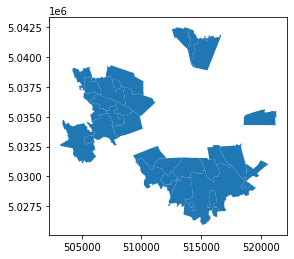

In [ ]:
quaProv = quartieri[quartieri.intersects(parchiMil.unary_union)]
quaProv.plot()

3  dato il nome di un parco, avere la mappa del parco con i comuni che lo ospitano

In [ ]:
nParco = input("Inserire il nome di un parco: ")
parco = parchi[parchi["NOME"] == nParco]
parcoSqueeze = parco.geometry.squeeze()
comParco =  comu[comu.intersects(parcoSqueeze)]
comParco
ax = parco.to_crs(epsg = 3857).plot(figsize=(10,10), facecolor = "none", edgecolor = "b", linewidth = 4)
comParco.to_crs(epsg = 3857).plot(ax = ax, facecolor = "none",linewidth=4, alpha = 0.3, edgecolor = "k" )
contextily.add_basemap(ax=ax)

4. dato il nome di un parco, avere la mappa del parco con le province che attraversa

In [ ]:
nomeParco = input("Inserisci il nome di un parco: ")
parco = parchi[parchi["NOME"] == nomeParco]
parcoSqueeze = parco.geometry.squeeze()
provinceParco =  prov[prov.intersects(parcoSqueeze)]
provinceParco
ax = parco.to_crs(epsg = 3857).plot(figsize=(20,20), facecolor = "none", edgecolor = "b", linewidth = 4)
provinceParco.to_crs(epsg = 3857).plot(ax = ax, facecolor = "y",linewidth=4, alpha = 0.3, edgecolor = "k" )
contextily.add_basemap(ax=ax)

5. dato un comune, avere i parchi che ospita (elenco e mappa)

In [ ]:
nomeCom = input("Inserisci il nome di un comune: ")
comune = comu[comu["COMUNE"] == nomeCom]
comSqueeze = comune.geometry.squeeze()
parchiCom =  parchi[parchi.intersects(comSqueeze)]
parchiCom
print("i parchi ospitati all'interno di questo comune sono: \n", parchiCom.NOME)
ax = comune.to_crs(epsg = 3857).plot(figsize=(20,20), facecolor = "none", edgecolor = "b", linewidth = 4)
parchiCom.to_crs(epsg = 3857).plot(ax = ax, facecolor = "y",linewidth=4, alpha = 0.3, edgecolor = "k" )
contextily.add_basemap(ax=ax)